# Method 1


Processing signal: (3**n)*u(n)
Z-transform: 1.0 + 3.0/z + 9.0/z**2 + 27.0/z**3 + 81.0/z**4 + 243.0/z**5 + 729.0/z**6 + 2187.0/z**7 + 6561.0/z**8 + 19683.0/z**9 + 59049.0/z**10
Signal type: causal
ROC: |z| > 3.0


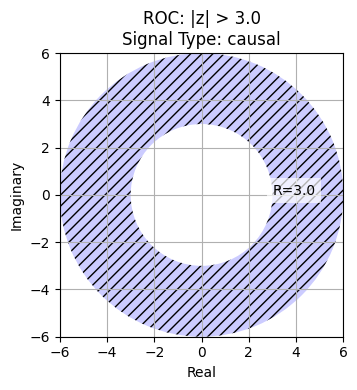


Processing signal: (2**n)*u(n)+(3**n)*u(n)
Z-transform: 2.0 + 5.0/z + 13.0/z**2 + 35.0/z**3 + 97.0/z**4 + 275.0/z**5 + 793.0/z**6 + 2315.0/z**7 + 6817.0/z**8 + 20195.0/z**9 + 60073.0/z**10
Signal type: causal
ROC: |z| > 2.5


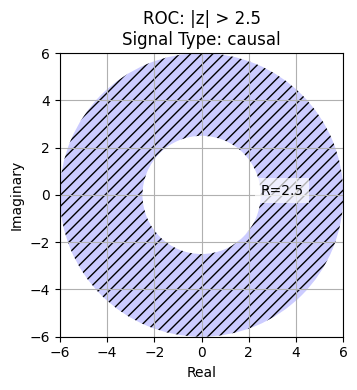


Processing signal: 2*sin(pi/4*n)*u(n)
Z-transform: 0.707106781186548/z + 1.0/z**2 + 0.707106781186548/z**3 + 1.22464679914735e-16/z**4 - 0.707106781186547/z**5 - 1.0/z**6 - 0.707106781186548/z**7 - 2.44929359829471e-16/z**8 + 0.707106781186547/z**9 + 1.0/z**10
Signal type: causal
ROC: |z| > 1.414213562373095


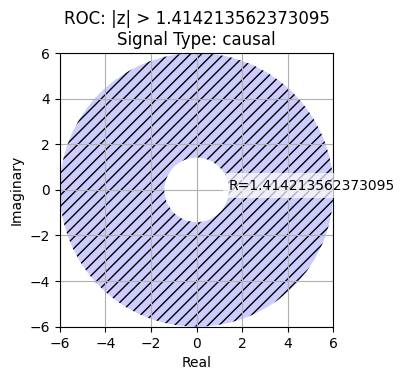

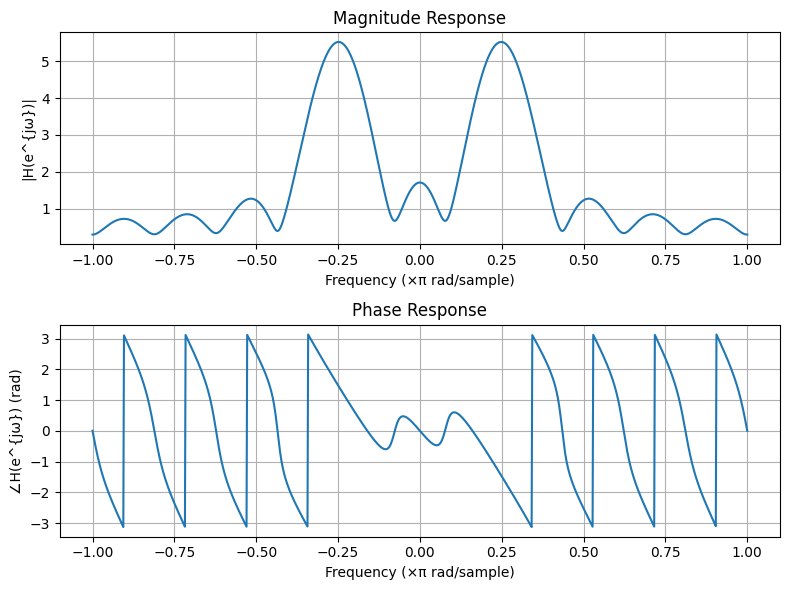


Processing signal: sin(pi*n/4)*u(n)
Z-transform: 1.22464679914735e-16/z - 2.44929359829471e-16/z**2 + 3.67394039744206e-16/z**3 - 4.89858719658941e-16/z**4 + 6.12323399573677e-16/z**5 - 7.34788079488412e-16/z**6 + 8.57252759403147e-16/z**7 - 9.79717439317883e-16/z**8 + 1.10218211923262e-15/z**9 - 1.22464679914735e-15/z**10
Signal type: causal
ROC: |z| > 2.0


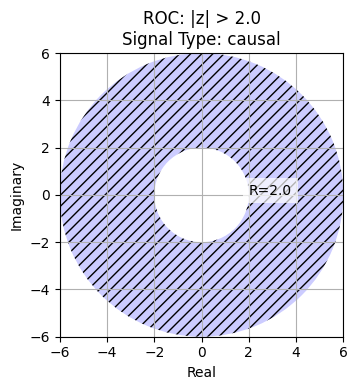

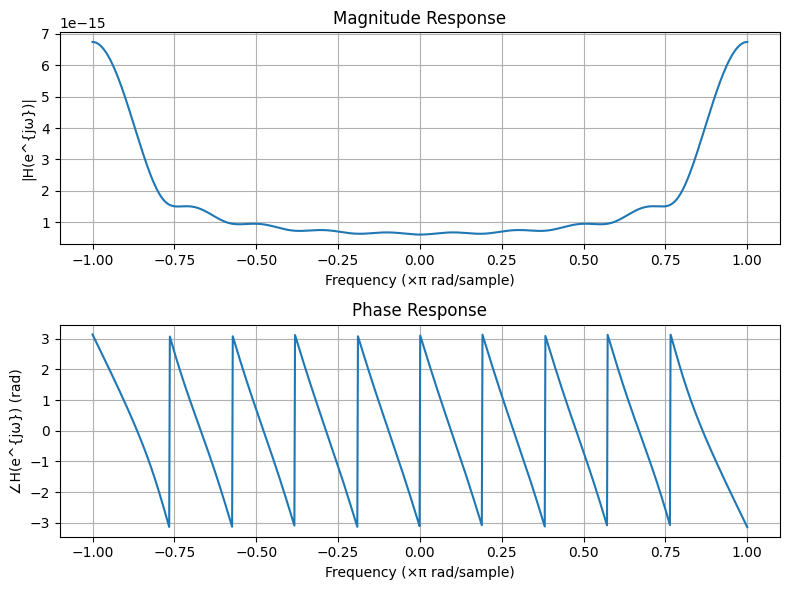

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol
import sympy as sp
import re
import matplotlib.patches as patches

def get_signal_kind(signal, n_values):
    # Simplified signal type determination
    non_zero = np.nonzero(signal)[0]
    if non_zero.size == 0:
        return "zero signal"
    if n_values[non_zero[0]] >= 0:
        return "causal"
    elif n_values[non_zero[-1]] < 0:
        return "anti-causal"
    else:
        return "non-causal"

def compute_z_transform(signal, n_values):
    # Compute Z-transform using a generator expression
    z = Symbol('z')
    z_expr = sum(x * z**(-n) for n, x in zip(n_values, signal) if x != 0)
    signal_type = get_signal_kind(signal, n_values)

    # Determine numeric parameter R from the ratio of first two nonzero values
    non_zero = np.nonzero(signal)[0]
    if non_zero.size >= 2:
        ratio = signal[non_zero[1]] / signal[non_zero[0]]
        R_val = abs(ratio) if ratio != 0 else 1
    else:
        R_val = 1

    # Build a parameters dictionary to simplify plotting logic
    if signal_type == "causal":
        params = {"type": "causal", "R": R_val}
    elif signal_type == "anti-causal":
        params = {"type": "anti-causal", "R": R_val}
    else:  # non-causal
        params = {"type": "non-causal", "R1": R_val/2, "R2": R_val*2}
    return z_expr, signal_type, params

def plot_magnitude_phase(z_expr):
    """Plot magnitude and phase response of the Z-transform"""
    theta = np.linspace(-np.pi, np.pi, 1000)
    z = np.exp(1j * theta)

    # Convert sympy expression to numpy-compatible function
    z_func = sp.lambdify(Symbol('z'), z_expr, 'numpy')
    response = z_func(z)

    magnitude = np.abs(response)
    phase = np.angle(response)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Magnitude plot
    ax1.plot(theta/np.pi, magnitude)
    ax1.set_title('Magnitude Response')
    ax1.set_xlabel('Frequency (×π rad/sample)')
    ax1.set_ylabel('|H(e^{jω})|')
    ax1.grid(True)

    # Phase plot
    ax2.plot(theta/np.pi, phase)
    ax2.set_title('Phase Response')
    ax2.set_xlabel('Frequency (×π rad/sample)')
    ax2.set_ylabel('∠H(e^{jω}) (rad)')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def show_signal_plots(signal, n_values, z_expr, signal_type, params, show_mag_phase=False):
    # ROC plot
    fig, ax = plt.subplots(figsize=(4,4))

    if params["type"] == "causal":
        R = params["R"]
        max_r = max(R * 1.5, 6)
        annulus = patches.Wedge((0, 0), max_r, 0, 360, width=max_r-R,
                                 facecolor='blue', alpha=0.2, hatch='///')
        ax.add_patch(annulus)
        ax.set_title(f'ROC: |z| > {R}\nSignal Type: causal')
        ax.text(R, 0, f"R={R}", fontsize=10, color='black',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    elif params["type"] == "anti-causal":
        R = params["R"]
        max_r = R * 1.5 if R*1.5 > 1.5 else 1.5
        circle_patch = patches.Circle((0, 0), R,
                                      facecolor='blue', alpha=0.2, hatch='///')
        ax.add_patch(circle_patch)
        ax.set_title(f'ROC: |z| < {R}\nSignal Type: anti-causal')
        ax.text(R, 0, f"R={R}", fontsize=10, color='black',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    else:
        R1, R2 = params["R1"], params["R2"]
        annulus = patches.Wedge((0, 0), R2, 0, 360, width=R2-R1,
                                facecolor='blue', alpha=0.2, hatch='///')
        ax.add_patch(annulus)
        ax.set_title(f'ROC: {R1} < |z| < {R2}\nSignal Type: non-causal')
        max_r = R2 * 1.1
        ax.text(R1, 0, f"R₁={R1}", fontsize=10, color='black',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
        ax.text(R2, 0, f"R₂={R2}", fontsize=10, color='black',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlim([-max_r, max_r])
    ax.set_ylim([-max_r, max_r])
    plt.tight_layout()
    plt.show()

    if show_mag_phase:
        plot_magnitude_phase(z_expr)

def generate_unit_step_signal(expr_components, n_values):
    """
    Create a signal based on expression components
    Parameters:
        expr_components: List of tuples (type, params)
        n_values: numpy array of time indices
    """
    signal = np.zeros_like(n_values, dtype=float)

    for comp_type, params in expr_components:
        if comp_type == 'exponential':
            base, shift = params
            indices = n_values >= shift
            signal[indices] += base ** (n_values[indices] - shift)
        elif comp_type == 'sinusoidal':
            amp, freq, shift = params
            indices = n_values >= shift
            signal[indices] += amp * np.sin(freq * (n_values[indices] - shift))

    return signal

def parse_expression(expr_str):
    """
    Parse complex expressions including sums and sinusoidal terms
    Returns: List of (type, params) tuples
    """
    components = []
    terms = expr_str.split('+')

    for term in terms:
        term = term.strip()

        # Check for sinusoidal expression
        sin_match = re.search(r'(\d*\.?\d*)?sin\(([^)]+)\)(.*)', term)
        if sin_match:
            amp = float(sin_match.group(1)) if sin_match.group(1) else 1.0
            freq_expr = sin_match.group(2).strip()

            # Handle frequency expression
            if 'pi' in freq_expr:
                freq_expr = freq_expr.replace('pi', str(np.pi))

            # Extract coefficient for n
            if '*n' in freq_expr or 'n' in freq_expr:
                if '*n' in freq_expr:
                    coef = freq_expr.split('*n')[0]
                else:
                    coef = '1'
                if '/' in coef:
                    num, denom = coef.split('/')
                    freq = float(num) / float(denom)
                else:
                    freq = float(coef)
            else:
                freq = float(freq_expr)

            # Extract shift from u(n) term if present
            shift_match = re.search(r'u\(n([+-]\d+)?\)', term)
            shift = int(shift_match.group(1)) if shift_match and shift_match.group(1) else 0

            components.append(('sinusoidal', (amp, freq, shift)))
            continue

        # Handle exponential terms
        exp_match = re.search(r'(\d+)\*\*n', term)
        if exp_match:
            base = float(exp_match.group(1))
            shift_match = re.search(r'u\(n([+-]\d+)?\)', term)
            shift = int(shift_match.group(1)) if shift_match and shift_match.group(1) else 0
            components.append(('exponential', (base, shift)))

    return components

def process_signal_expression(expr_str, n_values=None, show_mag_phase=False):
    """
    Process complex signal expressions including sums and sinusoidal terms
    """
    if n_values is None:
        n_values = np.arange(-10, 11)

    components = parse_expression(expr_str)
    signal = generate_unit_step_signal(components, n_values)
    z_expr, signal_type, params = compute_z_transform(signal, n_values)

    print(f"\nProcessing signal: {expr_str}")
    print(f"Z-transform: {z_expr}")
    print(f"Signal type: {signal_type}")

    # Print ROC based on signal type
    if signal_type == "non-causal":
        print(f"ROC: {params['R1']} < |z| < {params['R2']}")
    elif signal_type == "causal":
        print(f"ROC: |z| > {params['R']}")
    elif signal_type == "anti-causal":
        print(f"ROC: |z| < {params['R']}")
    else:
        print("ROC: undefined (zero signal)")

    show_signal_plots(signal, n_values, z_expr, signal_type, params, show_mag_phase)
    return signal, z_expr, signal_type, params

def demo():
    """Demo with string expression inputs"""
    expressions = [
        "(3**n)*u(n)",
        "(2**n)*u(n)+(3**n)*u(n)",
        "2*sin(pi/4*n)*u(n)",  # Changed exp to sin since exp wasn't properly handled
        "sin(pi*n/4)*u(n)",
    ]
    for expr in expressions:
        # Set show_mag_phase=True to see magnitude and phase plots
        process_signal_expression(expr, show_mag_phase=(expr == expressions[2] or expr == expressions[3]))

if __name__ == "__main__":
    demo()

# Method 2

1. Sequence: 3^n*u[n]
Z-transform: z/(z - 3)
ROC: |z| > 3


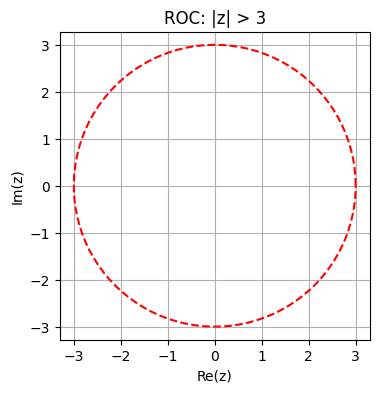

2. Sequence: 2^n*u[n] + 3^n*u[n]
Z-transform: z/(z - 2) + z/(z - 3)
ROC: |z| > 3


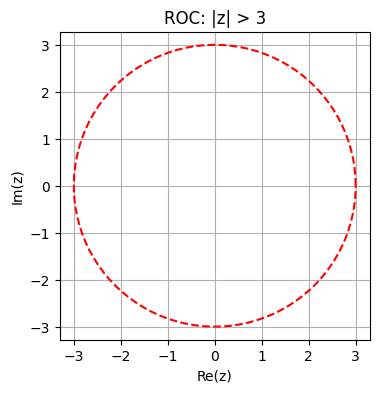

3. Sequence: e^(-0.2n)*u[n]
Z-transform: z/(z - 0.818730753077982)
ROC: |z| > 0.8187307530779818


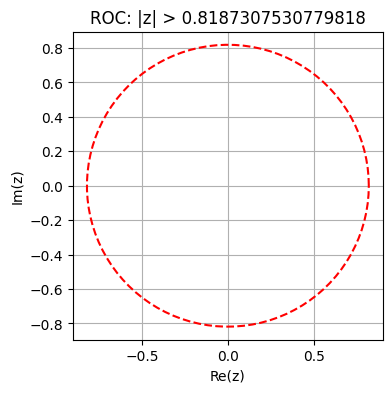

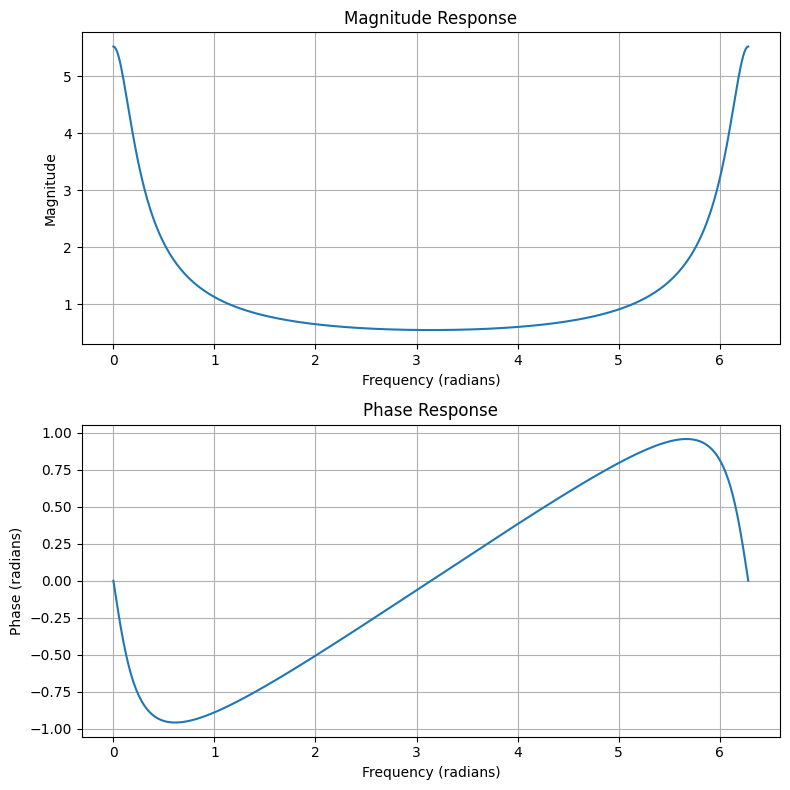

4. Sequence: sin(πn/4)u[n]
Z-transform: 0.707106781186548*z/(z**2 - 1.4142135623731*z + 1)
ROC: |z| > 1


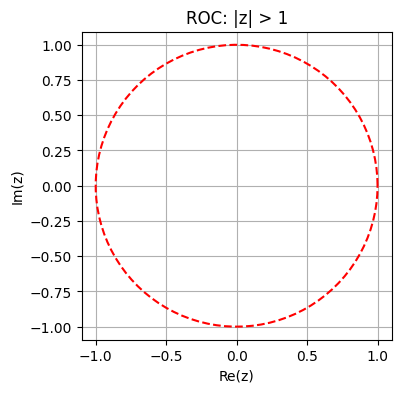

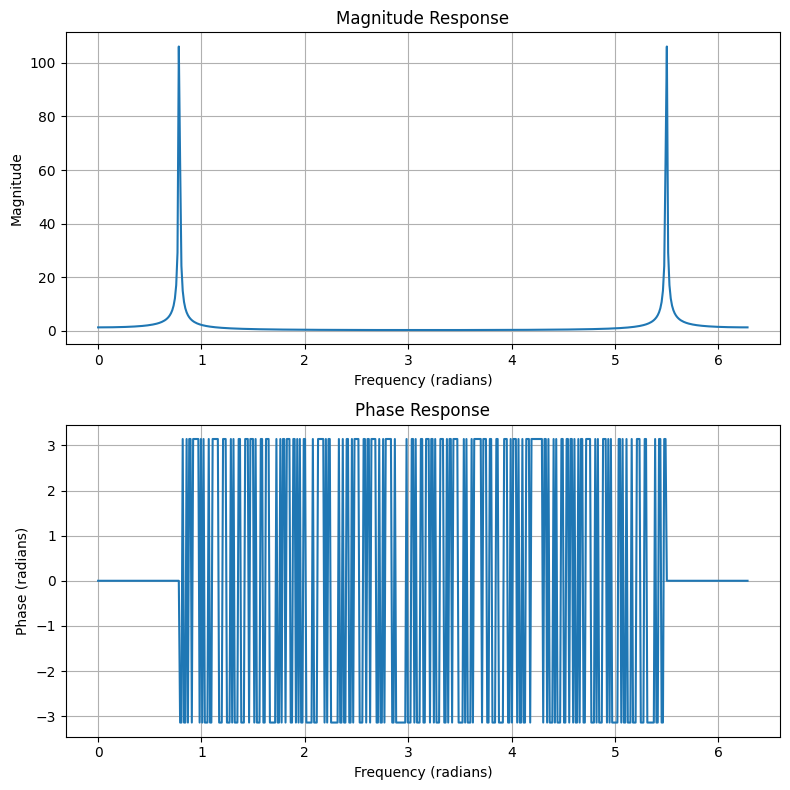

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Symbol, exp

def get_z_transform(sequence_type, *params):
    """Calculate Z-transform for different sequences"""
    z = Symbol('z')

    if sequence_type == "exponential":
        a = params[0]
        transform = z / (z - a)
        roc = f"|z| > {abs(a)}"
    elif sequence_type == "sum_exponential":
        a1, a2 = params
        max_a = max(abs(a1), abs(a2))
        transform = z/(z - a1) + z/(z - a2)
        roc = f"|z| > {max_a}"
    elif sequence_type == "sinusoidal":
        w = params[0]
        transform = z * np.sin(w) / (z**2 - 2*z*np.cos(w) + 1)
        roc = "|z| > 1"

    return transform, roc

def plot_roc(roc_condition):
    """Simple ROC plot"""
    # Extract radius value from ROC condition
    if 'max' in roc_condition:
        # Handle case with max() in ROC
        numbers = [float(x.strip()) for x in roc_condition.split('>')[-1].strip('max() ').split(',')]
        radius = max(numbers)
    else:
        # Handle simple case
        radius = float(roc_condition.split('>')[-1].strip())

    theta = np.linspace(0, 2*np.pi, 100)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    plt.figure(figsize=(4, 4))
    plt.plot(x, y, 'r--', label='ROC Boundary')
    plt.grid(True)
    plt.axis('equal')
    plt.title(f'ROC: {roc_condition}')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()

def plot_frequency_response(z_transform, show_magnitude=True, show_phase=True):
    """
    Plot frequency response with toggleable magnitude and phase
    """
    theta = np.linspace(0, 2*np.pi, 500)
    z_values = np.exp(1j * theta)
    z = Symbol('z')

    response = [complex(z_transform.subs(z, z_val)) for z_val in z_values]
    magnitude = np.abs(response)
    phase = np.angle(response)

    if show_magnitude or show_phase:
        if show_magnitude and show_phase:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

            ax1.plot(theta, magnitude)
            ax1.set_title('Magnitude Response')
            ax1.set_xlabel('Frequency (radians)')
            ax1.set_ylabel('Magnitude')
            ax1.grid(True)

            ax2.plot(theta, phase)
            ax2.set_title('Phase Response')
            ax2.set_xlabel('Frequency (radians)')
            ax2.set_ylabel('Phase (radians)')
            ax2.grid(True)

            plt.tight_layout()

        elif show_magnitude:
            plt.figure(figsize=(4, 4))
            plt.plot(theta, magnitude)
            plt.title('Magnitude Response')
            plt.xlabel('Frequency (radians)')
            plt.ylabel('Magnitude')
            plt.grid(True)

        else:  # show_phase only
            plt.figure(figsize=(6, 4))
            plt.plot(theta, phase)
            plt.title('Phase Response')
            plt.xlabel('Frequency (radians)')
            plt.ylabel('Phase (radians)')
            plt.grid(True)

        plt.show()


def solve(header, sequence_type, show_mag_phase=True, *params):
    """Solve and plot Z-transform for different sequences"""
    print(header)
    transform, roc = get_z_transform(sequence_type, *params)
    print(f"Z-transform: {transform}")
    print(f"ROC: {roc}")
    plot_roc(roc)
    plot_frequency_response(transform, show_magnitude=show_mag_phase, show_phase=show_mag_phase)

# Solve the given sequences
# 1. 3^n u[n]
solve("1. Sequence: 3^n*u[n]", "exponential", False, 3)

# 2. 2^n*u[n] + 3^n*u[n]
solve("2. Sequence: 2^n*u[n] + 3^n*u[n]", "sum_exponential", False, 2, 3)

# 3. e^(-0.2n)*u[n]
solve("3. Sequence: e^(-0.2n)*u[n]", "exponential", True, np.exp(-0.2))

# 4. sin(πn/4)u[n]
solve("4. Sequence: sin(πn/4)u[n]", "sinusoidal", True, np.pi/4)
